In [1]:
import tensorflow as tf

In [2]:
tf.config.list_physical_devices('GPU')

[]

In [3]:
from gensim.models import Word2Vec

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

In [5]:
df = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv',sep=',')
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [6]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [7]:
df['is_FK_Advantage_product'].value_counts()

False    993
True      57
Name: is_FK_Advantage_product, dtype: int64

> Produits exclusifs ?

In [8]:
df.describe()

,retail_price,discounted_price
count,1049.000000,1049.000000
mean,2186.197331,1584.527169
std,7639.229411,7475.099680
min,35.000000,35.000000
25%,555.000000,340.000000
50%,999.000000,600.000000
75%,1999.000000,1199.000000
max,201000.000000,201000.000000


In [9]:
df.loc[
    df['is_FK_Advantage_product'] == False
]

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ..."
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-medium-viny...,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >.

In [10]:
with pd.option_context("display.max_colwidth", 500, "display.max_columns", 5):
    display(df[['product_category_tree',
                'product_name',
                'description',
                'product_specifications'
               ]])


,product_category_tree,product_name,description,product_specifications
0,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]",Elegance Polyester Multicolor Abstract Eyelet Door Curtain,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a ...","{""product_specification""=>[{""key""=>""Brand"", ""value""=>""Elegance""}, {""key""=>""Designed For"", ""value""=>""Door""}, {""key""=>""Type"", ""value""=>""Eyelet""}, {""key""=>""Model Name"", ""value""=>""Abstract Polyester Door Curtain Set Of 2""}, {""key""=>""Model ID"", ""value""=>""Duster25""}, {""key""=>""Color"", ""value""=>""Multicolor""}, {""key""=>""Length"", ""value""=>""213 cm""}, {""key""=>""Number of Contents in Sales Package"", ""value""=>""Pack of 2""}, {""key""=>""Sales Package"", ""value""=>""2 Curtains""}, {""key""=>""Material"", ""value""=>""Polyes..."
1,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...""]",Sathiyas Cotton Bath Towel,"Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Color Red, Yellow, Blue Size Mediam Dimensions Length 30 inch Width 60 inch In the Box Number of Contents in Sales Package 3 Sales Package 3 Bath Towel","{""product_specification""=>[{""key""=>""Machine Washable"", ""value""=>""Yes""}, {""key""=>""Material"", ""value""=>""Cotton""}, {""key""=>""Design"", ""value""=>""Self Design""}, {""key""=>""Brand"", ""value""=>""Sathiyas""}, {""key""=>""Type"", ""value""=>""Bath Towel""}, {""key""=>""GSM"", ""value""=>""500""}, {""key""=>""Model Name"", ""value""=>""Sathiyas cotton bath towel""}, {""key""=>""Ideal For"", ""value""=>""Men, Women, Boys, Girls""}, {""key""=>""Model ID"", ""value""=>""asvtwl322""}, {""key""=>""Color"", ""value""=>""Red, Yellow, Blue""}, {""key""=>""Size"", ""va..."
2,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA...""]",Eurospa Cotton Terry Face Towel Set,"Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels of export quality. All our products have soft texture that takes care of your skin and gives you that enriched feeling you deserve. Eurospa has been exporting its bath towels to lot of renowned brands for last 10 years and is famous for its fine prin...","{""product_specification""=>[{""key""=>""Material"", ""value""=>""Cotton Terry""}, {""key""=>""Design"", ""value""=>""SHUVAM""}, {""key""=>""Brand"", ""value""=>""Eurospa""}, {""key""=>""GSM"", ""value""=>""360""}, {""key""=>""Type"", ""value""=>""Face Towel Set""}, {""key""=>""Model Name"", ""value""=>""SHUVAM20PCFTSETASSORTED""}, {""key""=>""Ideal For"", ""value""=>""Boys, Girls, Men, Women""}, {""key""=>""Model ID"", ""value""=>""SHUVAM20PCFTSETASSORTED""}, {""key""=>""Size"", ""value""=>""small""}, {""key""=>""Color"", ""value""=>""Assorted""}, {""key""=>""Weight"", ""valu..."
3,"[""Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ...""]",SANTOSH ROYAL FASHION Cotton Printed King sized

# Création variable Cible
    On sélectionne par expressions régulières la première catégorie de bien.
    La plus globale pour chaque type de bien

In [11]:
import re

In [12]:
df['target'] = (
    df['product_category_tree'].
    str.replace("\s+\>>\s+.*$" ,'', regex = True). # On supprime tout après '>>'
    str.replace('[','', regex = False). # On supprime les '['
    str.replace('"','', regex = False) # On supprime les '"'
)

df['target'].value_counts()

Home Furnishing               150
Baby Care                     150
Watches                       150
Home Decor & Festive Needs    150
Kitchen & Dining              150
Beauty and Personal Care      150
Computers                     150
Name: target, dtype: int64

#### Nos classes ont été parfaitement bien réparties !

In [13]:
df['retail_price'].isna().mean()

0.0009523809523809524

In [14]:
df.groupby('target')['retail_price'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
Baby Care,149.0,1291.953020,1436.266379,70.0,529.00,849.0,1490.00,12500.0
Beauty and Personal Care,150.0,1217.300000,3116.139372,85.0,360.00,409.5,837.50,25499.0
Computers,150.0,3647.520000,5474.385051,199.0,999.00,2225.0,3999.00,38890.0
Home Decor & Festive Needs,150.0,2796.893333,3528.848224,279.0,999.00,1500.0,2737.50,22525.0
Home Furnishing,150.0,2108.873333,2038.152069,259.0,950.00,1599.0,2686.75,14798.0
Kitchen & Dining,150.0,799.906667,590.877681,35.0,499.00,599.0,821.50,4000.0
Watches,150.0,3434.973333,18547.190761,235.0,749.25,950.0,1286.75,201000.0


# Nettoyage Texte

In [15]:
import spacy 
# Modèle pour des petits documents de texte , ici des descriptions de produits
nlp = spacy.load("en_core_web_sm")

In [16]:
from nltk.corpus import stopwords

In [17]:
stops = set(stopwords.words('english'))
print(stops,len(stops))

{'hers', 'itself', 'then', 'am', 'up', 'after', 'now', 'an', 'so', "aren't", 're', 'my', 'because', 'than', 'further', 'he', 'ain', 'below', "you've", 'our', 'why', 'those', 'd', 'while', "couldn't", "won't", "didn't", "that'll", 'such', 'didn', 'in', 'under', 'his', 'from', "you're", 'doesn', 'about', 'being', 'o', 'shouldn', 've', 'does', 'i', 'it', 'haven', 'do', "isn't", 'yours', 'm', 'any', "mustn't", 'myself', 'yourselves', 'some', 'nor', 'whom', 'few', 'ourselves', 'been', 'into', 'through', 'not', 'above', 'your', 'all', "it's", 'here', 'mightn', 'during', 'out', 'before', 'of', 'did', 'be', 'too', 'wasn', 'by', 'them', 'weren', 'me', 'very', "weren't", 'until', 'with', 'having', "mightn't", 'is', 'if', 'when', 'just', "shan't", 'off', 'will', 'ours', 'no', 'for', "you'd", 'have', 'there', 'they', 'the', 'or', 'again', "doesn't", 'over', 't', 'more', 'she', 'her', 'their', 'doing', 'own', "wasn't", 'has', 'down', 'to', 'himself', 'but', 'at', "you'll", 'are', 'between', "don't"

In [18]:
with pd.option_context("display.max_colwidth", 500, "display.max_columns", 5):
    display(df[['target',
                'product_name',
                'description'
               ]])


,target,product_name,description
0,Home Furnishing,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a ..."
1,Baby Care,Sathiyas Cotton Bath Towel,"Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Color Red, Yellow, Blue Size Mediam Dimensions Length 30 inch Width 60 inch In the Box Number of Contents in Sales Package 3 Sales Package 3 Bath Towel"
2,Baby Care,Eurospa Cotton Terry Face Towel Set,"Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels of export quality. All our products have soft texture that takes care of your skin and gives you that enriched feeling you deserve. Eurospa has been exporting its bath towels to lot of renowned brands for last 10 years and is famous for its fine prin..."
3,Home Furnishing,SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet,"Key Features of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet Royal Bedsheet Perfact for Wedding & Gifting,Specifications of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet (1 Bedsheet,2 Pillow Cover, Multicolor) General Brand SANTOSH ROYAL FASHION Machine Washable Yes Type Flat Material Cotton Model Name Gold Design Royal Cotton Printed Wedding & Gifted Double Bedsheet With 2 Pillow cover Model ID goldbedi-38 Color Multicolor Size King Fabric Care Machine W..."
4,Home Furnishing,Jaipur Print Cotton Floral King sized Double Bedsheet,"Key Features of Jaipur Print Cotton Floral King sized Double Bedsheet 100% cotton,Jaipur Print Cotton Floral King sized Double Bedsheet (1 bed sheet 2 pillow cover, White) Price: Rs. 998 This nice bed sheet made up of 100% cotton to give you comfort. This bed sheet is hand printed. This bedsheet gives nice look to your room And its fast colour and good quality gives this bedsheet long life.,Specifications of Jaipur Print Cotton Floral King sized Double Bedsheet (1 bed sheet 2 pillow cover, W..."
...,...,...,...
1045,Baby Care,Oren Empower Extra Large Self Adhesive Sticker,Oren Empower Extra Large Self Adhesive Sticker (Pack of 2)\r\n Price: Rs. 999\r\n\t\t\t\t\r\n\t\t\tDouble sticker can be used for the big walls. Two pieces is there that can be arranged alternatively or reflectively. This will d�cor the wall like 3d look. Tree with the green shaded leaves will give the sharp feature of the greenery. Reusable i.e. Can be used again after applied once. Simple remove and re-use the sticker on same or another wall with a different idea\r\...
1046,Baby Care,Wallmantra Large Vinyl Sticker Sticker,"Wallmantra Large Vinyl Sticker Sticker (Pack of 1)\r\n Price: Rs. 1,896\r\n\t\t\t\t\r\n\t\t\tBring home this exclusive Piece of Wall Art to give your home a refreshing look it deserves !\r\nWall Decals are the latest trend, sweeping the world of interior design, as a quick and easy way to personalise and transform your home. We at Wallmantra use only the highest quality premium self-adhesive vinyl for our products to ensure you receive the best quality product.\r\nThe..."
1047,Baby Care,Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker,Buy Uberlyfe Extra Large Pi

###### présence de NA ?

In [19]:
df[['target',
    'product_name',
    'description'
   ]].isna().mean()

target          0.0
product_name    0.0
description     0.0
dtype: float64

###### présence de message vide ?

In [20]:
(df['target'] == '').mean(),(df['product_name'] == '').mean(),(df['description'] == '').mean()

(0.0, 0.0, 0.0)

### Nettoyage par Regex
    \n, \t, \r n'apporte pas d'information 

In [21]:
df['description'].str.contains('\r|\t|\n').mean()

0.1657142857142857

In [22]:
with pd.option_context("display.max_colwidth", 500, "display.max_columns", 5):
    display(
    df['description'].str.replace('\r|\t|\n',' ', regex=True)
    )

0       Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a ...
1                                                              Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Color Red, Yellow, Blue Size Mediam Dimensions Length 30 inch Width 60 inch In the Box Number of Contents in Sales Package 3 Sales Packa

## Fonction pour nettoyage

### Suppression des caractères spéciaux

#### Fonction simplify très utile pour du texte en français, ici en anglais il n'y a pas d'accent sur les mots

In [23]:
import unicodedata

def simplify(text):
    try:
        text = unicode(text, 'utf-8')
    except NameError:
        pass
    text = unicodedata.normalize('NFD',text).encode('ascii','ignore').decode('utf-8')
    return str(text)
print(simplify('Ceci est un test çaé#è@hello Gutentag !!!! Je vous lève mon châpeau !, Good morning Sire '))

Ceci est un test cae#e@hello Gutentag !!!! Je vous leve mon chapeau !, Good morning Sire 


#### On peut utiliser directemment un pré-traitement par expréssion régulière ou regex pour nettoyer le texte
1. Pré-traitement par expression régulière
2. Mise en minuscule des caractères

In [24]:
un_exemple_serie = pd.Series([
    'Ceci est un test çaé#è@hello Gutentag !!!!',
    'Je vous lève mon châpeau !',
    'Good morning Sire ',
    'Le modèle CamenBert est trop fort',
    'I believe Bert is better !',
    "I can't believe it !!!!"
]
                      )

In [25]:
# Suppression des accents, caractères spéciaux, émoticons, ponctuation
# Mise en minuscule des caractères
def pre_nettoyage_texte(serie_pandas):
    
    #serie_pandas = serie_pandas.str.replace('\r|\t|\n',' ', regex=True)
    
    # On ne conserve que les caractères alpha numériques
    # les émoticons,caractères spéciaux et ponctuation sont remplacés par des espaces
    
    serie_pandas = serie_pandas.str.replace(r'[^a-zA-Z0-9]', ' ', regex = True)
    
    # L'ensemble des caractères est mis en minuscule
    
    serie_pandas = serie_pandas.str.lower()
    
    # rajouter ponctuation Unicode data ?
    return serie_pandas    
print(un_exemple_serie, '\n',
      pre_nettoyage_texte(un_exemple_serie))

0    Ceci est un test çaé#è@hello Gutentag !!!!
1                    Je vous lève mon châpeau !
2                            Good morning Sire 
3             Le modèle CamenBert est trop fort
4                    I believe Bert is better !
5                       I can't believe it !!!!
dtype: object 
 0    ceci est un test  a    hello gutentag     
1                    je vous l ve mon ch peau  
2                            good morning sire 
3             le mod le camenbert est trop fort
4                    i believe bert is better  
5                       i can t believe it     
dtype: object


> On remarque cette fonction est adapté pour la langue anglaise mais absolmuent pas pour le français ! 
- modèle devient mod
- lève devient l ve
- châpeau devient ch peau

#### Pour y remédier en français on pourrait utiliser simplify puis la fonction pre_nettoyage_texte

In [26]:
print(un_exemple_serie, '\n',
      pre_nettoyage_texte(
          (un_exemple_serie).map(simplify)) # fonction simplify qui transforme par ex : les é en e
     )

0    Ceci est un test çaé#è@hello Gutentag !!!!
1                    Je vous lève mon châpeau !
2                            Good morning Sire 
3             Le modèle CamenBert est trop fort
4                    I believe Bert is better !
5                       I can't believe it !!!!
dtype: object 
 0    ceci est un test cae e hello gutentag     
1                    je vous leve mon chapeau  
2                            good morning sire 
3             le modele camenbert est trop fort
4                    i believe bert is better  
5                       i can t believe it     
dtype: object


### Lemmatisation 

#### Fonction pour lémmatisation 

1. Lemmatisation avec Spacy fonction nlp
2. Suppresion des stopwords avec nltk
3. suppression des ponctuation et espace avec Spacy

In [27]:
# Lemmatisation avec Spacy fonction nlp
# Suppresion des stopwords avec nltk
# suppression des ponctuation et espace avec Spacy
def nettoyage_texte(serie_pandas):
    
    # On lemmatise avec Spacy
    serie_pandas = ' '.join(y.lemma_ for y in nlp(serie_pandas)  
                    
                    # condition si
                    if
                    
                    # Suppression des tokens inclus dans stops
                    y.text not in stops and
                    
                    # Suppresion des tokens lemmatisés inclus dans stops
                    y.lemma_ not in stops and
                    
                    # Suppression ponctuation 
                    not y.is_punct and
                    
                    # Suppression des espaces
                    not y.is_space
                           )
                   
    return str(serie_pandas)

In [28]:
def pipeline_nlp(serie_pandas):
    # fonction 1 pré traitement par regex et mise en minuscule
    serie_pandas = pre_nettoyage_texte(serie_pandas)
    # fonction 2 lemmatisation + suppression stopwords nltk
    serie_pandas = serie_pandas.map(nettoyage_texte)
    return serie_pandas

### Exemples de nettoyage avec lemmatisation

In [29]:
sentences = pd.Series(["j'ai mal au ventre",
                       "Tommorow I see YOU",
                       'What is it ! #foodtruck ?',
                       '$$$ Dollars , I need some DOLAARSSS'
                      ])
print('Fonction : pre_nettoyage_texte \n')
print(pre_nettoyage_texte(sentences))
print('\n Fonction : nettoyage_texte')
print(pre_nettoyage_texte(sentences).map(nettoyage_texte))

Fonction : pre_nettoyage_texte 

0                     j ai mal au ventre
1                     tommorow i see you
2              what is it    foodtruck  
3        dollars   i need some dolaarsss
dtype: object

 Fonction : nettoyage_texte
0       j ai mal au ventre
1             tommorow see
2                foodtruck
3    dollar need dolaarsss
dtype: object


## Application

In [30]:
df['description_pre_clean'] = pre_nettoyage_texte(df['description'])

In [31]:
df['description_clean'] = df['description_pre_clean'].map(nettoyage_texte)

In [32]:
with pd.option_context("display.max_colwidth", 500, "display.max_columns", 5):
    display(
df['description_pre_clean']
    )

0       key features of elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain  213 cm in height  pack of 2  price  rs  899 this curtain enhances the look of the interiors this curtain is made from 100  high quality polyester fabric it features an eyelet style stitch with metal ring it makes the room environment romantic and loving this curtain is ant  wrinkle and anti shrinkage and have elegant apparance give your home a ...
1                                                              specifications of sathiyas cotton bath towel  3 bath towel  red  yellow  blue  bath towel features machine washable yes material cotton design self design general brand sathiyas type bath towel gsm 500 model name sathiyas cotton bath towel ideal for men  women  boys  girls model id asvtwl322 color red  yellow  blue size mediam dimensions length 30 inch width 60 inch in the box number of contents in sales package 3 sales packa

In [33]:
with pd.option_context("display.max_colwidth", 500, "display.max_columns", 5):
    display(
    df['description_clean']
    )

0       key feature elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain 213 cm height pack 2 price rs 899 curtain enhance look interior curtain make 100 high quality polyester fabric feature eyelet style stitch metal ring make room environment romantic love curtain ant wrinkle anti shrinkage elegant apparance give home bright modernistic appeal design surreal attention sure steal heart contemporary eyelet valance curtai...
1                                                                                                       specification sathiyas cotton bath towel 3 bath towel red yellow blue bath towel feature machine washable yes material cotton design self design general brand sathiyas type bath towel gsm 500 model name sathiyas cotton bath towel ideal man woman boy girl model asvtwl322 color red yellow blue size mediam dimension length 30 inch width 60 inch box number content sale package 3 sale packa

# Bag of words & Tfidf

## Visualisation

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

def generer_ngrams(dataframe, n):
    # Convertir la série en une liste de textes
    textes = dataframe.tolist()

    # Créer un objet CountVectorizer avec les paramètres appropriés
    vectorizer = CountVectorizer(ngram_range=(n, n))

    # Calculer la matrice des N-grams
    matrice_ngrams = vectorizer.fit_transform(textes)

    # Obtenir les noms des N-grams
    noms_ngrams = vectorizer.get_feature_names_out()

    # Obtenir les fréquences des N-grams
    frequences_ngrams = matrice_ngrams.sum(axis=0).A1

    # Créer un dataframe avec les N-grams et leurs fréquences
    dataframe_ngrams = pd.DataFrame({'N_gram': noms_ngrams, 'Fréquence': frequences_ngrams})

    return dataframe_ngrams

# Exemple d'utilisation
serie_texte = pd.Series(['Ce texte est un exemple', 'Un autre exemple de texte', 'Encore un exemple'])

dataframe_ngrams = generer_ngrams(serie_texte, 2)

print(dataframe_ngrams)

          N_gram  Fréquence
0  autre exemple          1
1       ce texte          1
2       de texte          1
3      encore un          1
4         est un          1
5     exemple de          1
6      texte est          1
7       un autre          1
8     un exemple          2


In [35]:
test_plot = generer_ngrams(df['description_pre_clean'],2).sort_values('Fréquence',ascending = False).head(10)
test_plot

,N_gram,Fréquence
18872,shipping cash,564
5320,cash on,564
15461,only genuine,564
15222,on delivery,564
9424,free shipping,564
9768,genuine products,564
9053,flipkart com,472
7122,day replacement,470
17123,products 30,469
17706,replacement guarantee,469


<AxesSubplot:xlabel='Fréquence', ylabel='N_gram'>

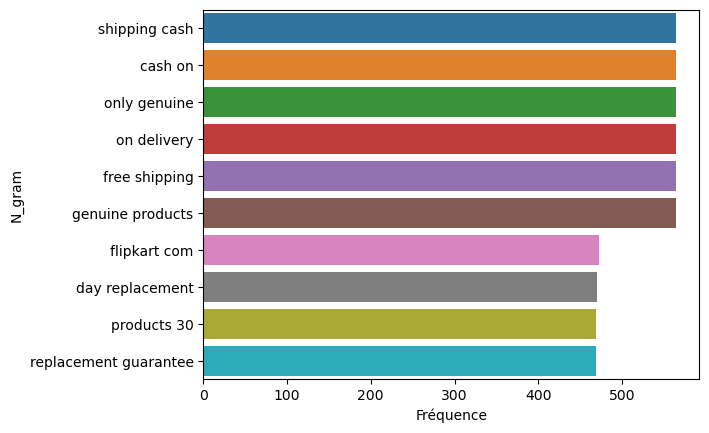

In [36]:
sns.barplot(
    data=test_plot,
    x='Fréquence',
    y='N_gram'
           )

In [37]:
generer_ngrams(df['description_clean'],2).sort_values('Fréquence',ascending = False).head(20)

,N_gram,Fréquence
4332,cash delivery,564
8459,free shipping,564
16612,shipping cash,564
8741,genuine product,564
8273,flipkart com,472
6194,day replacement,471
15408,replacement guarantee,469
764,30 day,469
14747,product 30,469
14572,price rs,342


In [38]:
for i in df['target'].unique():
    df.loc[
        df['target'] == i
    ]
    print(
        '\n',
        i,
        '\n',
        generer_ngrams(df.loc[
            df['target']==i]['description_clean'],2).sort_values('Fréquence',ascending = False).head(20)
         )


 Home Furnishing 
                N_gram  Fréquence
1310     flipkart com         74
2451    shipping cash         74
1374  genuine product         74
1343    free shipping         74
797       com genuine         74
2141     product free         74
629     cash delivery         74
2378     sale package         62
2099         price rs         54
999     cushion cover         46
1923   number content         40
847      content sale         40
470        box number         39
1367    general brand         35
1984     package pack         33
1634      key feature         32
135             40 cm         28
707          cm width         28
1126     door curtain         26
316     aroma comfort         23

 Baby Care 
                  N_gram  Fréquence
331           baby girl        170
323            baby boy         99
3000       sale package         85
1891         ideal baby         80
1650     general detail         73
2442     number content         70
977        content sale     

> On voir des bigrams comme 'cash delivery' , 'shipping cash', 'free shipping' , ces derniers sont présents sur tous les produits et ne vont par conséquences pas nous aider à les distinguer
Ce sont des constantes ou stopwords à supprimer.
Tous les produits du site sont en effet par définition livrable à domicile

In [39]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications', 'target',
       'description_pre_clean', 'description_clean'],
      dtype='object')

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

def generer_tfidf(dataframe):
    # Convertir la série en une liste de textes
    textes = dataframe.tolist()

    # Créer un objet TfidfVectorizer avec les paramètres appropriés
    vectorizer = TfidfVectorizer()

    # Calculer la matrice TF-IDF
    matrice_tfidf = vectorizer.fit_transform(textes)

    # Obtenir les noms des mots
    noms_mots = vectorizer.get_feature_names_out()

    # Obtenir les fréquences pondérées des mots
    frequences_ponderes = matrice_tfidf.sum(axis=0).A1

    # Créer un dataframe avec les mots et leurs fréquences pondérées
    dataframe_tfidf = pd.DataFrame({'Mot': noms_mots, 'frequences_ponderes': frequences_ponderes})

    return dataframe_tfidf

# Exemple d'utilisation
serie_texte = pd.Series(['Ce texte est un exemple', 'Un autre exemple de texte', 'Encore un exemple'])

dataframe_tfidf = generer_tfidf(serie_texte)

print(dataframe_tfidf)

       Mot  frequences_ponderes
0    autre             0.552490
1       ce             0.552490
2       de             0.552490
3   encore             0.767495
4      est             0.552490
5  exemple             1.105914
6    texte             0.840366
7       un             1.105914


In [41]:
generer_tfidf((df['description_clean'])).sort_values('frequences_ponderes',ascending = False).head(20)

,Mot,frequences_ponderes
1531,com,49.139136
2271,flipkart,48.861101
3873,product,42.060209
4347,shipping,41.444926
1364,cash,41.444926
2409,genuine,41.444926
1792,delivery,41.388788
2321,free,41.098985
1296,buy,40.918572
1760,day,35.255657


# New_stops
    Ces mots n'apportent pas d'informations

In [42]:
new_stops = ['cash','rs','delivery','flipkart','com','guarantee',
             '30','cash','product','shipping','genuine','free','buy',
             'price','replacement','day'
            ]

In [43]:
for i in df['target'].unique():
    df.loc[
        df['target'] == i
    ]
    print(
        '\n',
        i,
        '\n',
        generer_tfidf(df.loc[
            df['target']==i]['description_clean']).sort_values('frequences_ponderes',ascending = False).head(20)
         )


 Home Furnishing 
           Mot  frequences_ponderes
281       buy            11.458640
478      free            11.386874
290      cash            11.363698
833  shipping            11.363698
374  delivery            11.363698
466  flipkart            11.363698
323       com            11.363698
493   genuine            11.363698
738   product            11.089939
801        rs             9.015599
310        cm             8.544444
195  abstract             6.982648
345    cotton             6.795485
260   blanket             6.654163
922     towel             6.608470
347     cover             6.395729
845    single             6.327615
391    double             6.291875
754     quilt             6.082938
357   cushion             5.894552

 Baby Care 
            Mot  frequences_ponderes
214       baby            13.146684
599       girl             9.863636
440     detail             9.315977
400     cotton             7.984666
461      dress             7.864099
516     fabric 

# Premier modèle KMeans
    On fait un premier modèle sans modifier les stopwords pour avoir une baseline

In [44]:
df[['product_name','description']]

,product_name,description
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...
...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,Oren Empower Extra Large Self Adhesive Sticker...
1046,Wallmantra Large Vinyl Sticker Sticker,Wallmantra Large Vinyl Sticker Sticker (Pack o...
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...
1048,Wallmantra Medium Vinyl Sticker Sticker,Buy Wallmantra Medium Vinyl Sticker Sticker fo...


In [45]:
print('Nombre de clusters à trouver : ',df['target'].nunique())

Nombre de clusters à trouver :  7


In [46]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from gensim.models import Word2Vec

from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score

## Modèle Bags of words & tfidf

In [47]:
vectorizer = TfidfVectorizer() # Tfidf
counter = CountVectorizer(ngram_range = (1,2)) # N-grams, ici 1,2 soit unigramme et bigrammes

# Exemple de code de la documentation de scikit-learn
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

Z = counter.fit_transform(corpus)

print(
    vectorizer.get_feature_names_out(),
    counter.get_feature_names_out()
)

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this'] ['and' 'and this' 'document' 'document is' 'first' 'first document' 'is'
 'is the' 'is this' 'one' 'second' 'second document' 'the' 'the first'
 'the second' 'the third' 'third' 'third one' 'this' 'this document'
 'this is' 'this the']


In [48]:
# Sur nos données 
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['description_clean'])
vectorizer.get_feature_names_out()

array(['00', '000', '001', ..., 'zoom', 'zora', 'zyxel'], dtype=object)

In [49]:
X

<1050x5246 sparse matrix of type '<class 'numpy.float64'>'
	with 37216 stored elements in Compressed Sparse Row format>

In [50]:
# model = KMeans(n_clusters = 7, random_state=62023).fit(X)
# y_pred = model.predict(X)
# df['cluster'] = y_pred

# Word2Vec

In [51]:
import gensim

In [52]:
# model2vec = Word2Vec(
#          df['description_clean'],
#          min_count=3,   # Ignore words that appear less than this
#          vector_size=df['description_clean'].shape[0],       # Dimensionality of word embeddings
#          sg = 0,        # CBOW
#          window=7,      # Context window for words during training
#          epochs=40)       # Number of epochs training over corpus

In [53]:
# # Obtention de la liste de tous les mots uniques après le prétraitement
# unique_words = list(set([word for sentence in df['description_clean'] for word in sentence]))

# # Création d'une matrice de vecteurs initialement remplie de zéros
# matrix = np.zeros((len(unique_words),50))

# # Remplissage de la matrice avec les vecteurs correspondant à chaque mot unique
# for i, word in enumerate(unique_words):
#     if word in model2vec.wv:
#         matrix[i] = model2vec.wv[word]

In [54]:
# matrix

In [55]:
# # model2vec.get_feature_names_out() ne fonctionne pas !
# matrix = model2vec.wv.vectors

In [56]:
# df.shape

In [57]:
# matrix.T.shape

## Création d'un modèle selon tuto

In [58]:
# pip install tensorflow

In [59]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

In [60]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 24 # adapt to length of sentences
tk_gensim = df['description_clean'].to_list()
tk_gensim = [gensim.utils.simple_preprocess(text) for text in tk_gensim]

In [61]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(tk_gensim)
w2v_model.train(tk_gensim, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 4407
Word2Vec trained


In [62]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tk_gensim)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(tk_gensim),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 4408


In [63]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (4408, 300)


In [64]:
df.shape

(1050, 18)

In [65]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 24)]              0         
                                                                 
 embedding (Embedding)       (None, 24, 300)           1322400   
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 1,322,400
Trainable params: 1,322,400
Non-trainable params: 0
_________________________________________________________________


In [66]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 [==============================] - 0s 681us/step


(1050, 300)

In [67]:
embeddings

array([[ 0.00696074, -0.15413307,  0.32128337, ..., -0.13208003,
        -0.08006156,  0.1297214 ],
       [ 0.14402618, -0.4338402 ,  0.24063587, ..., -0.01537668,
        -0.25309274,  0.5180862 ],
       [ 0.17652111, -0.4936774 ,  0.40145802, ..., -0.0224835 ,
        -0.51328313,  0.35208774],
       ...,
       [-0.14303689,  0.27623641,  0.21434353, ..., -0.8791232 ,
        -0.343466  ,  0.9430457 ],
       [-0.27859104,  0.17786026,  0.22785853, ..., -1.0727159 ,
        -0.5423261 ,  0.7976659 ],
       [-0.14247675,  0.27236205,  0.19403802, ..., -0.9736174 ,
        -0.39188695,  0.9634557 ]], dtype=float32)

In [68]:
import time
from sklearn import cluster, metrics

l_cat = list(set(df['target']))
print("catégories : ", l_cat)
y_cat_num = [(1-l_cat.index(df.iloc[i]['target'])) for i in range(len(df))]

# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features) :
    time1 = time.time()
    num_labels=len(l_cat)
    tsne = TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('clusters')
    
    plt.show()
    print("ARI : ", ARI)

catégories :  ['Computers', 'Home Decor & Festive Needs', 'Baby Care', 'Watches', 'Home Furnishing', 'Beauty and Personal Care', 'Kitchen & Dining']


In [69]:
ARI, X_tsne, labels = ARI_fct(embeddings)

ARI :  0.276 time :  5.0


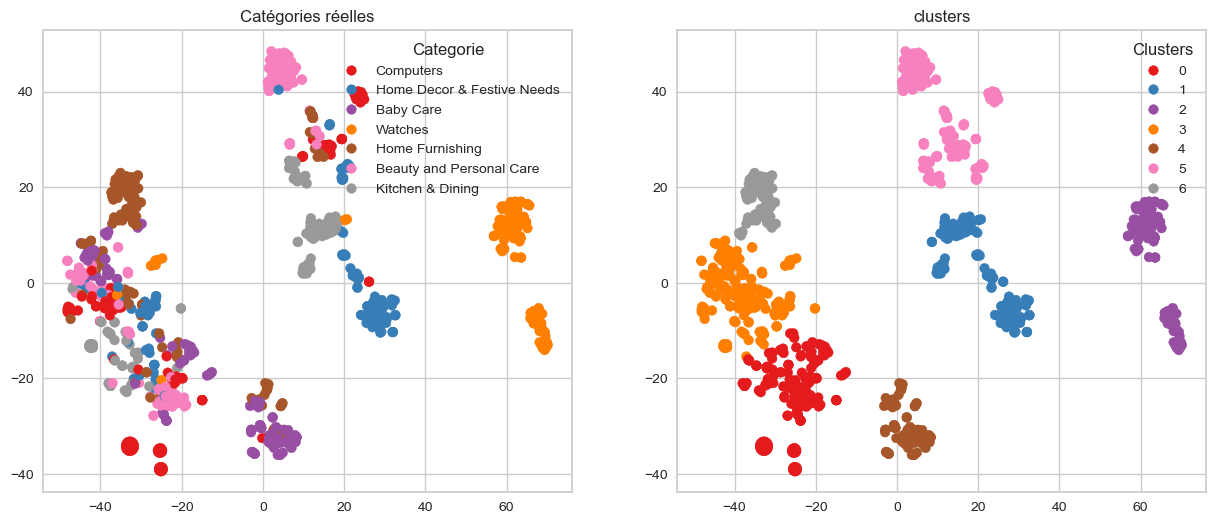

ARI :  0.276


In [70]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# Bert

In [71]:
# !pip uninstall pytest

^C


In [72]:
# !pip install transformers

In [77]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers
# from transformers import *

os.environ["TF_KERAS"]='1'

In [78]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.12.0
2.12.0
Num GPUs Available:  0
False


In [79]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = transformers.AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

In [80]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications', 'target',
       'description_pre_clean', 'description_clean'],
      dtype='object')

In [81]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = transformers.TFAutoModel.from_pretrained(model_type)
sentences = df['description_clean'].to_list()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [82]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

C:\Users\Hankour\anaconda3\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Hankour\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


1/1 [==============================] - 1s 528ms/step
temps traitement :  65.0


In [83]:
ARI, X_tsne, labels = ARI_fct(features_bert)

ARI :  0.3494 time :  6.0


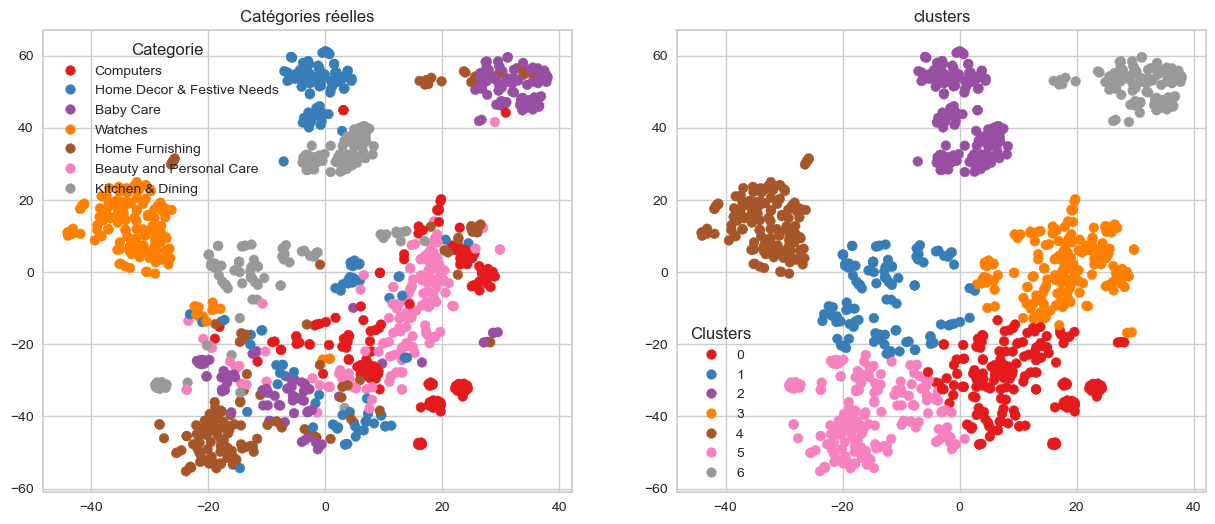

ARI :  0.3494


In [84]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

## Tweet

In [85]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = transformers.TFAutoModel.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')
sentences = df['description_clean'].to_list()

Some layers from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment were not used when initializing TFRobertaModel: ['classifier']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [86]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

1/1 [==============================] - 0s 491ms/step
temps traitement :  64.0


In [87]:
ARI, X_tsne, labels = ARI_fct(features_bert)

ARI :  0.1025 time :  6.0


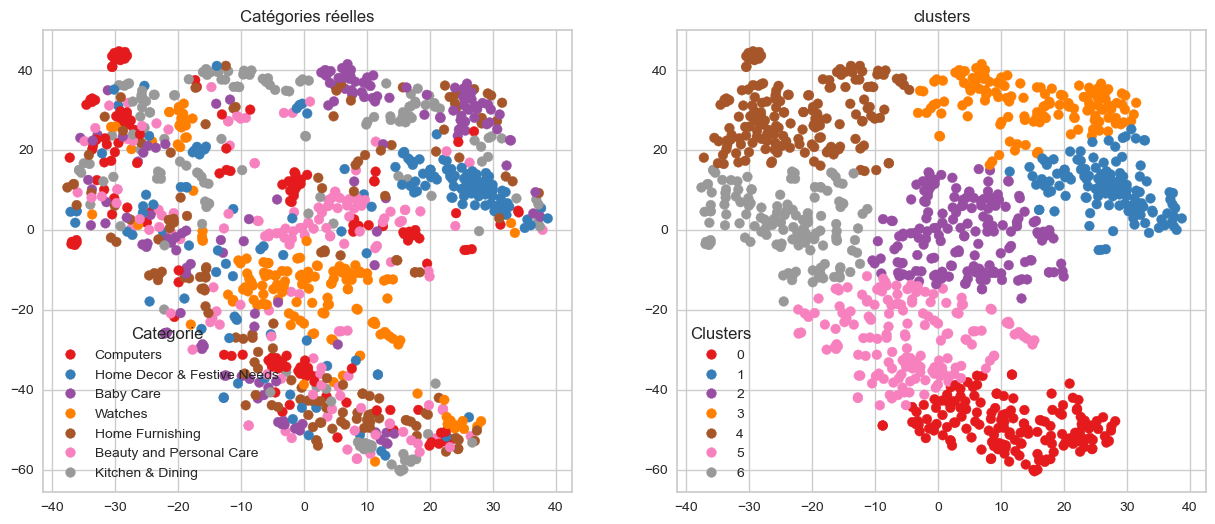

ARI :  0.1025


In [88]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# USE

In [90]:
#!pip install tensorflow_hub

     ---------------------------------------- 100.6/100.6 kB ? eta 0:00:00


In [91]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [92]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [93]:
batch_size = 10
sentences = df['description_clean'].to_list()

In [94]:
features_USE = feature_USE_fct(sentences, batch_size)

In [95]:
ARI, X_tsne, labels = ARI_fct(features_USE)

ARI :  0.4297 time :  5.0


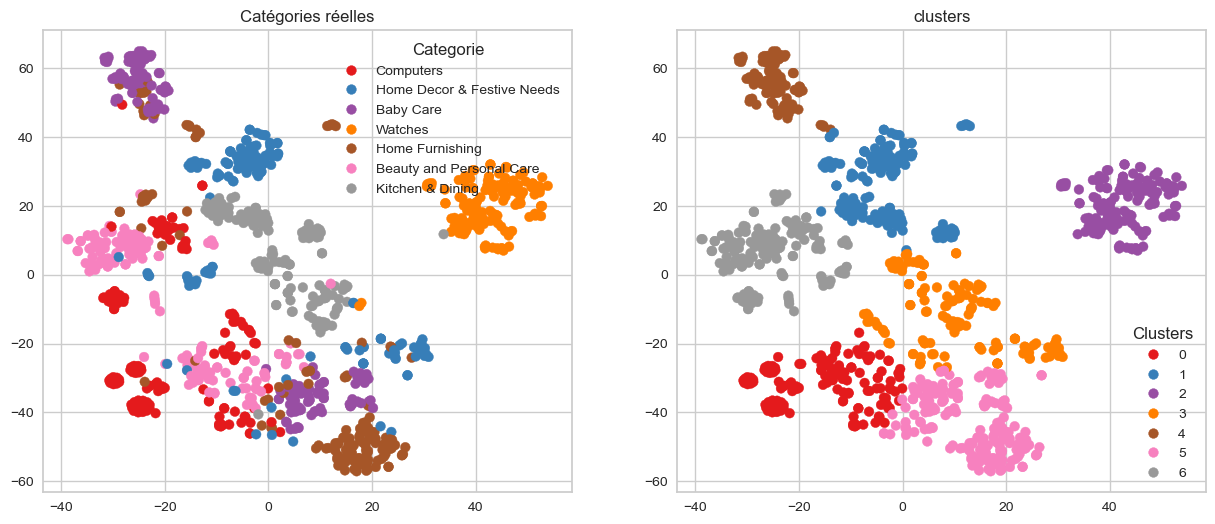

ARI :  0.4297


In [96]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [142]:
from transformers import BertTokenizer, BertModel
import torch

In [143]:
import tensorflow_hub as hub
import tensorflow_text 

# Guide sur le Tensorflow hub : https://www.tensorflow.org/text/tutorials/classify_text_with_bert
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)

ModuleNotFoundError: No module named 'tensorflow_hub'

In [ ]:
sentences = data_T['sentence_dl'].to_list()

In [ ]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='TFhub')

In [54]:
# # Charger le modèle pré-entraîné BERT
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# model = BertModel.from_pretrained('bert-base-uncased')

# # Fonction pour appliquer la transformation BERT sur chaque texte de la série
# def bert_transform(text):
#     # Tokenisation du texte
#     tokens = tokenizer.encode(text, add_special_tokens=True)
#     tokens_tensor = torch.tensor([tokens])
    
#     # Obtenir les embeddings du modèle BERT
#     with torch.no_grad():
#         embeddings = model(tokens_tensor)[0]  # [0] pour récupérer les embeddings de la couche finale
        
#     return embeddings

# # Exemple d'utilisation sur une série pandas appelée 'df' avec une colonne 'text'
# df['bert_embeddings'] = df['description_clean'].apply(bert_transform)



# Transformation Word2Vec avec la bibliothèque gensim :
# python
# Copy code
# from gensim.models import Word2Vec
# import pandas as pd

# # Fonction pour appliquer la transformation Word2Vec sur chaque texte de la série
# def word2vec_transform(text):
#     # Prétraitement du texte en une liste de phrases
#     sentences = [sentence.split() for sentence in text.split('.')]
    
#     # Entraîner le modèle Word2Vec
#     model = Word2Vec(sentences, min_count=1)
    
#     # Obtenir la représentation vectorielle moyenne des phrases
#     vector = model.wv[sentences].mean(axis=0)
    
#     return vector

# # Exemple d'utilisation sur une série pandas appelée 'df' avec une colonne 'text'
# df['word2vec_embeddings'] = df['text'].apply(word2vec_transform)
# Transformation USE (Universal Sentence Encoder) avec la bibliothèque tensorflow-hub :
# python
# Copy code
# import tensorflow_hub as hub
# import tensorflow as tf
# import pandas as pd

# # Charger le modèle USE
# module_url = "https://tfhub.dev/google/universal-sentence-encoder-large/5"
# model = hub.load(module_url)

# # Fonction pour appliquer la transformation USE sur chaque texte de la série
# def use_transform(text):
#     embeddings = model([text])
#     return embeddings[0]

# # Exemple d'utilisation sur une série pandas appelée 'df' avec une colonne 'text'
# df['use_embeddings'] = df['text'].apply(use_transform)
# Ces exemples vous montrent comment effectuer les transformations BERT, Word2Vec et USE sur une série pandas en utilisant différentes bibliothèques Python populaires. Assurez-vous d'adapter les paramètres et les noms de colonnes en fonction de votre cas d'utilisation spécifique.

C:\Users\Hankour\anaconda3\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Hankour\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [55]:
# df['bert_embeddings']

0       [[[tensor(-0.4087), tensor(0.0283), tensor(0.2...
1       [[[tensor(-0.4322), tensor(-0.1654), tensor(0....
2       [[[tensor(-0.3694), tensor(-0.0914), tensor(0....
3       [[[tensor(-0.4901), tensor(-0.2075), tensor(-0...
4       [[[tensor(-0.2118), tensor(0.0202), tensor(-0....
                              ...                        
1045    [[[tensor(-0.4433), tensor(0.3339), tensor(-0....
1046    [[[tensor(-0.6603), tensor(0.2375), tensor(-0....
1047    [[[tensor(-0.3536), tensor(-0.0016), tensor(-0...
1048    [[[tensor(-0.3375), tensor(0.1561), tensor(-0....
1049    [[[tensor(-0.3274), tensor(-0.0180), tensor(-0...
Name: bert_embeddings, Length: 1050, dtype: object

In [76]:
# from sklearn.cluster import KMeans

# # Extraire les embeddings BERT dans une matrice
# embeddings = df['bert_embeddings'].tolist()
# embedding_matrix = [embedding.numpy() for embedding in embeddings]

# # Instancier l'algorithme K-means
# kmeans = KMeans(n_clusters=7)  # Spécifiez le nombre de clusters souhaité

# # Effectuer le clustering sur les embeddings
# kmeans.fit(embedding_matrix)

# # Obtenir les étiquettes de cluster pour chaque exemple
# cluster_labels = kmeans.labels_

# # Ajouter les étiquettes de cluster à la série pandas
# df['cluster_labels'] = cluster_labels

In [47]:
#conda install -c conda-forge spacy-transformers


In [48]:
#pip install spacy-transformers
#conda install -c conda-forge spacy-transformers


In [49]:
#! python -m spacy download en_trf_bertbaseuncased_lg

In [52]:
#from spacy-transformers import TransformersLanguage, TransformersWordPiecer, TransformersTok2Vec


In [ ]:
nlp_bert = en_trf_bertbaseuncased_lg.load()

# Avec stop_words

In [65]:
# Modèles de features / transformation avec stopwords
vectorizer = TfidfVectorizer(stop_words = (new_stops)) # Tfidf
counter = CountVectorizer(ngram_range = (1,2), stop_words = new_stops) # N-grams, ici 1,2 soit unigramme et bigrammes
# ajouter BERT
# ajouter word2vev
# ajouter USE

def kmeans_texte(transformer,features):
    X = transformer.fit_transform(features)
    model = KMeans(n_clusters = 7, random_state=62023).fit(X)
    y_pred = model.predict(X)
    return X, y_pred


# exemple 
kmeans_texte(counter,df['description_clean'])
X, y_pred

NameError: name 'y_pred' is not defined

# Fonction :  ARI et visualisation par Tsne et heatmap

In [74]:
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score

# model = KMeans(n_clusters = 7, random_state=62023).fit(X)
# y_pred = model.predict(X)
# df['cluster'] = y_pred


def ARI_viz(X):
    
    # Modèle Kmeans avec 7 clusters == 7 catégories de biens à prédire
    model = KMeans(n_clusters = 7, random_state=62023).fit(X)
    y_pred = model.predict(X)
    #df['cluster'] = y_pred

    X_embedded = TSNE(n_components=2, learning_rate='auto',
                   init='random', perplexity=3,random_state = 62023 ).fit_transform(X)


    fig = plt.figure(figsize=(20,20))

    # Graphique 1 TSNE clusters

    plt.subplot(2,2,1) # ligne, colonne, élément

    data_tsne = pd.DataFrame(X_embedded)
    data_tsne.columns = ['pc1','pc2']
    data_tsne['cluster'] = y_pred
    palette = sns.color_palette("Paired", 7)
    sns.scatterplot(data=data_tsne, x='pc1',y='pc2',hue='cluster',palette=palette)
    
    plt.title('TSNE des clusters')
    
    # Graphique 2 TSNE des vrais groupes

    plt.subplot(2,2,2)

    data_tsne['target'] = df['target']
    sns.scatterplot(data=data_tsne, x='pc1',y='pc2', hue='target',palette=palette)
    
    plt.title('TSNE des vrais groupes')

    # Graphique 3 Matrice de corrélation ou heatmap entre vrais groupes et clusters
    
    plt.subplot(2,2,3)

    sns.heatmap(
        pd.crosstab(data_tsne['target'],data_tsne['cluster']),
        cmap= 'coolwarm',
        annot=True

    )
    
    plt.title('Matrice des corrélations entre clusters et vrais groupes')
    
    return plt.show(), print('ARI : ', adjusted_rand_score(data_tsne['target'],data_tsne['cluster']))
            


#plt.show()

#print('ARI : ', adjusted_rand_score(tmp['target'],tmp['cluster']))

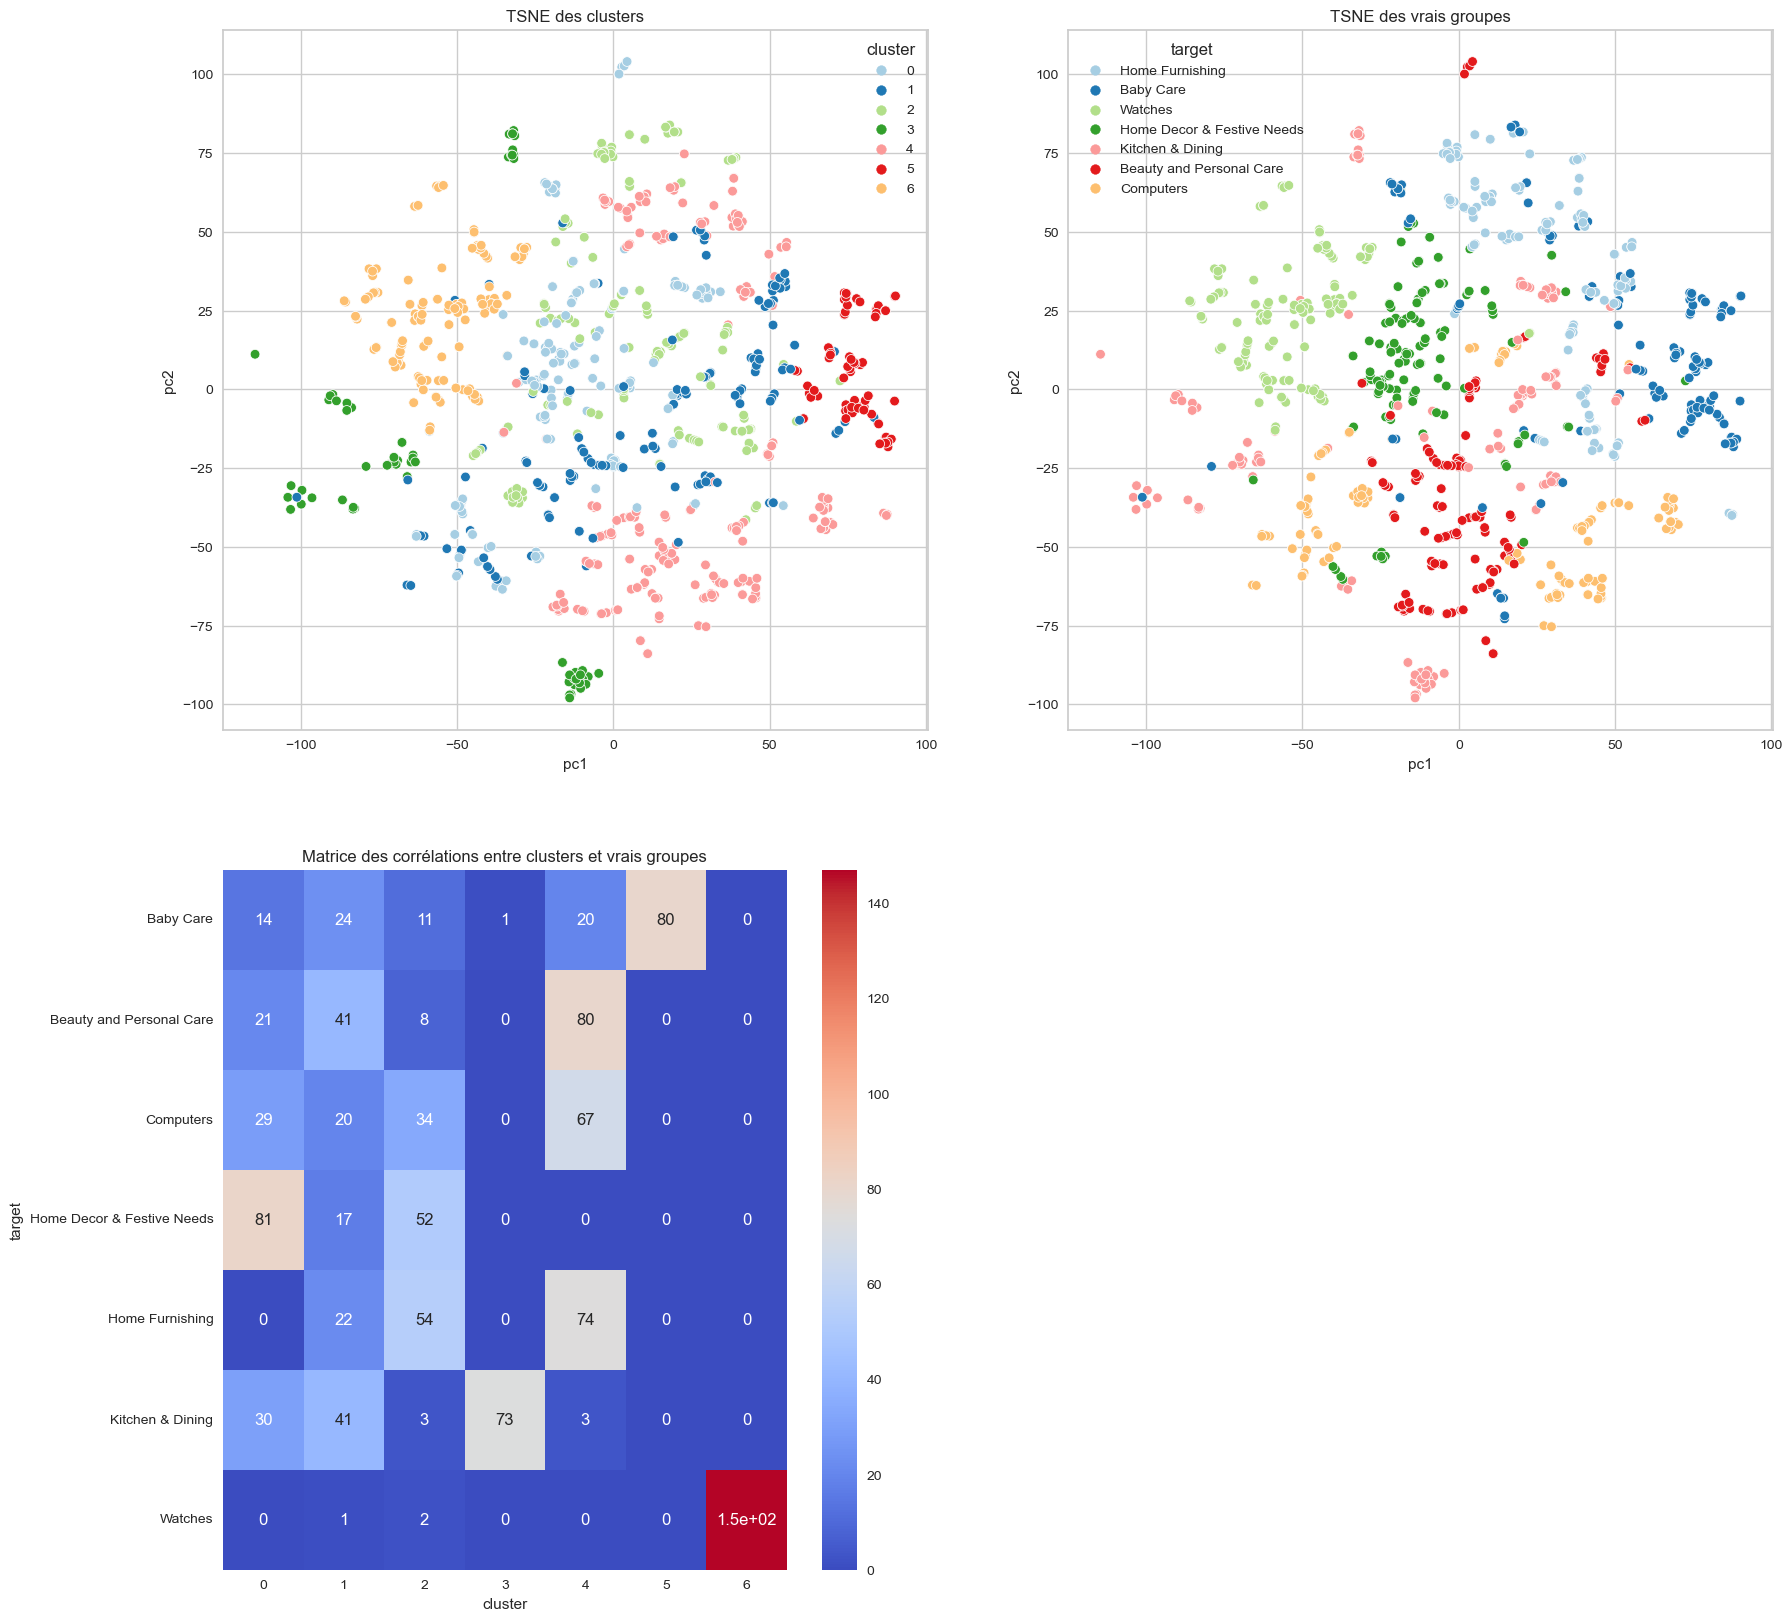

ARI :  0.3173710995985318


(None, None)

In [70]:
ARI_viz(X)

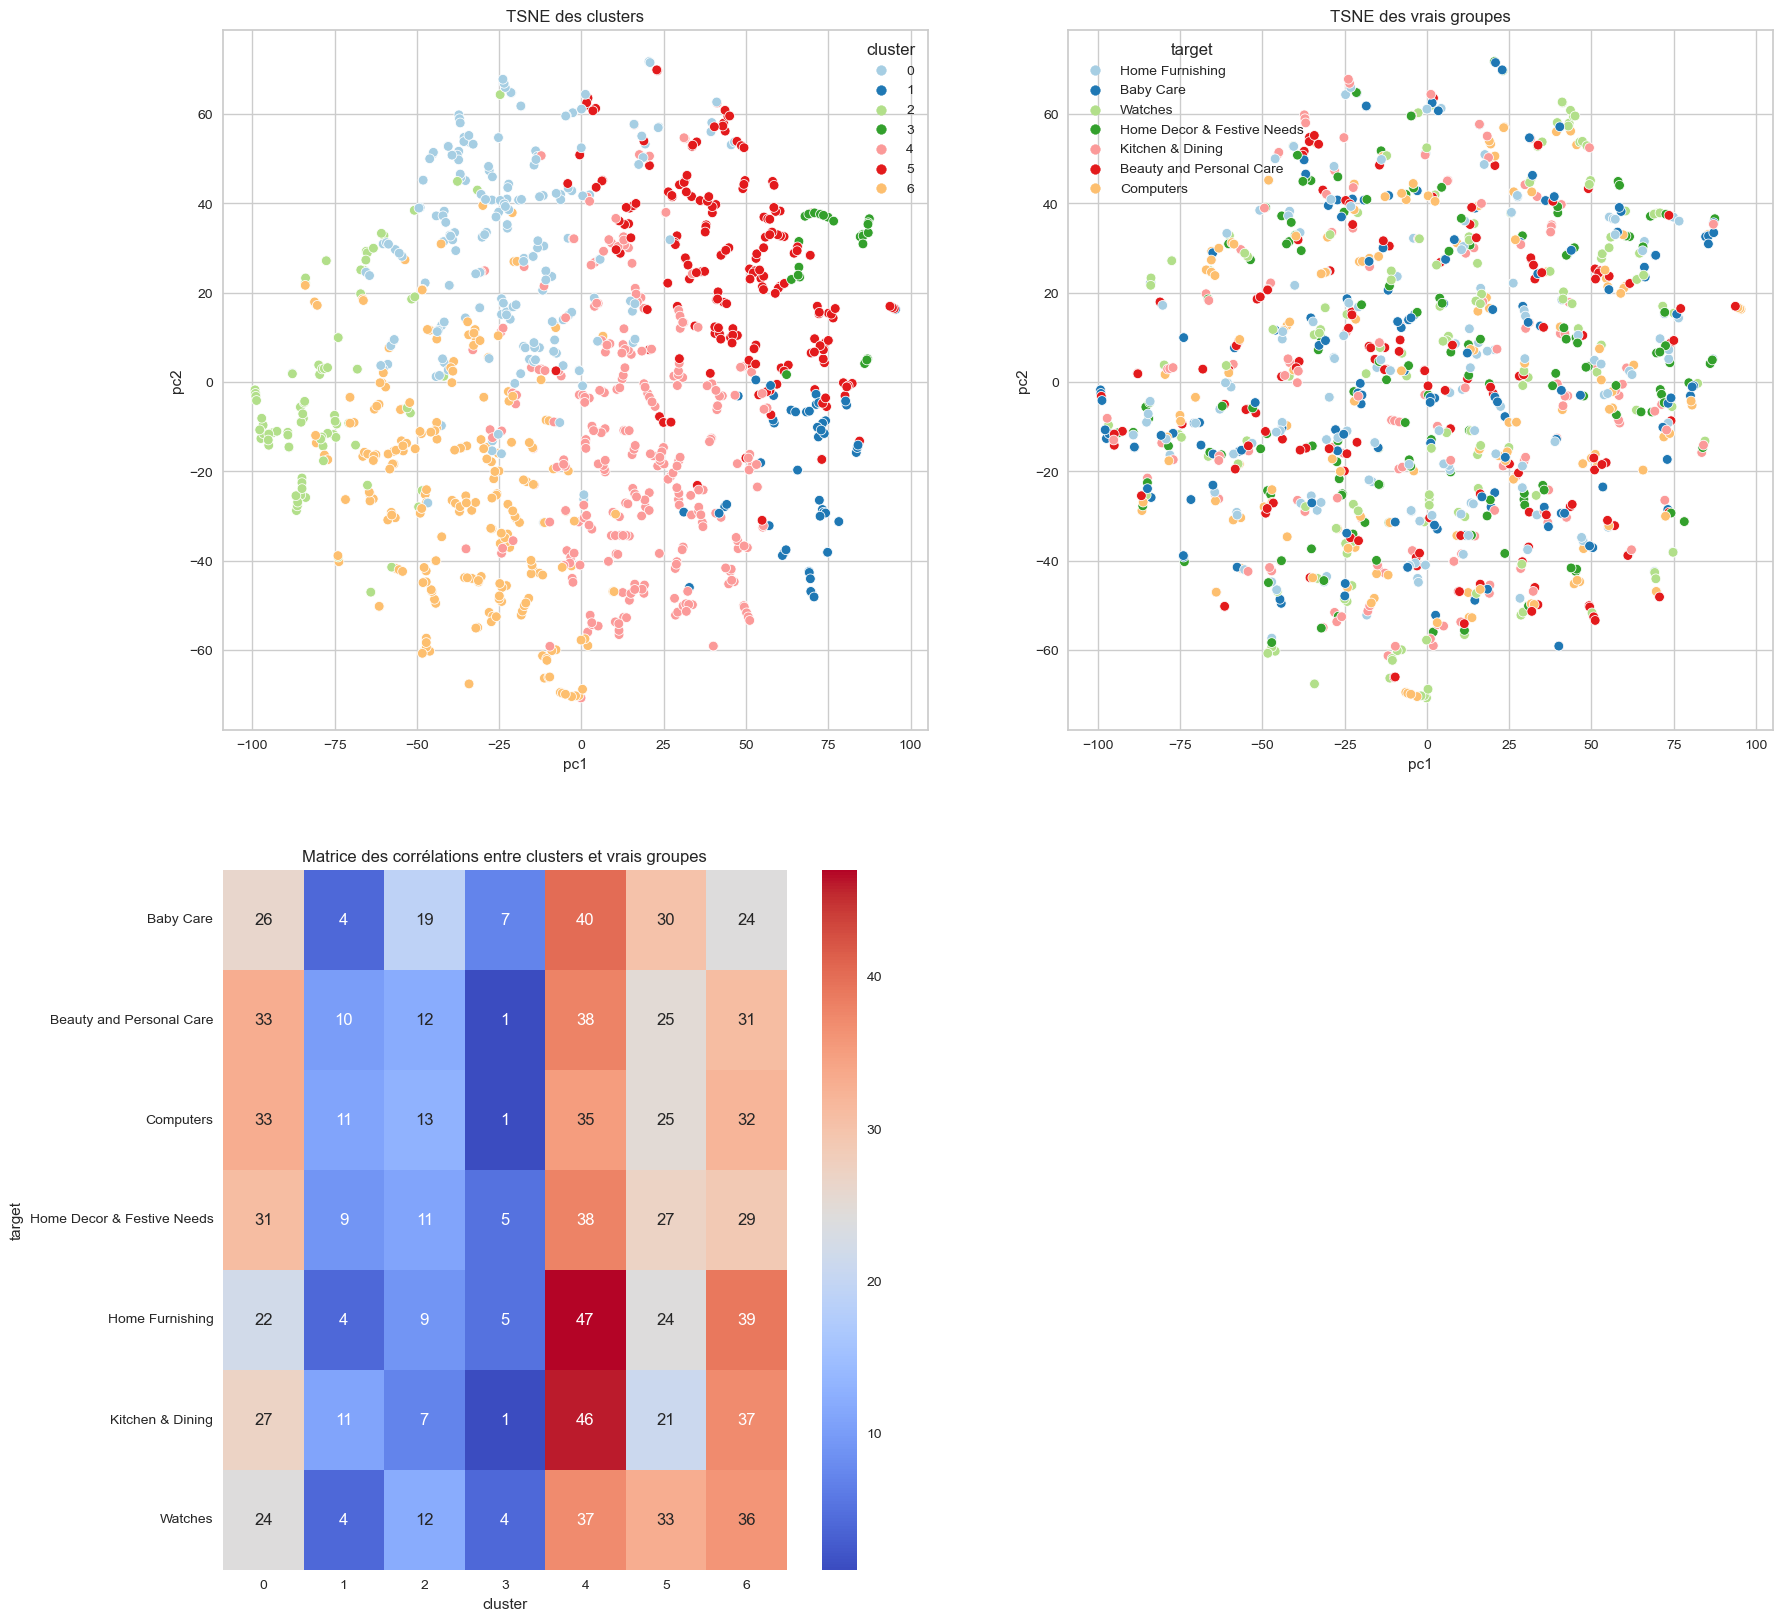

ARI :  -0.00023018101456718227


(None, None)

In [101]:
ARI_viz(matrix.T)

# Brouillon

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(
    pd.crosstab(tmp['target'],tmp['cluster']),
    cmap= 'RdBu',
    annot=True
)
plt.show()

In [ ]:
# # Instantiate the clustering model and visualizer
# model = KMeans()
# visualizer = KElbowVisualizer(model, k=(2,12))

# visualizer.fit((X))    # Fit the data to the visualizer
# visualizer.poof()    # Draw/show/poof the data

# plt.show()

In [ ]:
import time

# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features) :
    time1 = time.time()
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_

In [ ]:
import unicodedata

def nettoyer_texte(texte):
    # Supprimer les caractères spéciaux et émoticons
    texte_propre = ''.join(c for c in texte if unicodedata.category(c)[0] != 'S')
    
    return texte_propre

# Exemple d'utilisation
texte_original = "Salut ! Comment ça va ? 😃 # excité � "
texte_nettoye = nettoyer_texte(texte_original)

print(texte_nettoye)

In [ ]:
import re

texte = "Il y a ! des caractères spéciaux 123 et des espaces___ 😃 # excité �"

texte_propre = re.sub(r'[^a-zA-Z0-9]', ' ', texte)

print(texte_propre)


In [ ]:
import re

texte = "Il y a ! des caractères spéciaux 123 et des espaces___ et des chiffres 2.34 % il m'en reste 2."

texte_propre = re.sub(r'(?<!\d)\.(?!\d)|\.(?!\d)|\.(?=\s|$)|[^a-zA-Z0-9.]', ' ', texte)

print(texte_propre)

In [ ]:
with pd.option_context("display.max_colwidth", 500, "display.max_columns", 5):
    display(
    (df['description']).str.replace(r'[^a-zA-Z0-9]', ' ', regex = True).head()
    )

In [ ]:
with pd.option_context("display.max_colwidth", 500, "display.max_columns", 5):
    display(
df['description_clean'][1045:1049].map(nettoyer_texte)
    )

In [ ]:
from collections import Counter

(df['description_clean']).map(Counter)